# Classification

Download the fruits data [here](https://drive.google.com/file/d/1M8tiAWDZclABJN1Meq9oEHCLJTNyHdpP/view?usp=share_link)

In [ ]:
# import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_classification

# import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

# Import validation
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score

In [ ]:
fruit_data = _ # Load the fruits dataset
fruits_X = _  # Features. We'll pick 2
fruits_y = _  # Labels

# Convert everything to a np array
fruits_x, fruits_y = np.asarray(fruits_X), np.asarray(fruits_y)

print (fruits_X.shape, fruits_y.shape)

(177, 2) (177,)


In [ ]:
# we create 100 separable points
X, y = make_classification(n_samples = _ , n_features= _ , n_classes = _ , n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=11)
X_train, X_test, y_train, y_test = train_test_split( _ , _ , test_size = 0.2, random_state=1)


# Plot train / test data
_, axes = plt.subplots (1,2, figsize=(8,4))
axes[0].scatter( _ , _ , c = _ , edgecolors='k', cmap='Paired')
axes[1].scatter( _ , _ , c='b', edgecolors='k')
axes[1].scatter( _ , _ , c='r', edgecolors='k')

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [55]:
import sklearn

def plot_decision_boundary (clf, x, y, res=None, n_points=None, offset=0.1, ax = None, ax_names = None):
    #
    assert x.shape[1] == 2, ValueError('Num features (cols) must be 2. Current: {0}'.format(x.shape[1]))
    if not n_points and not res: n_points = 50
    
    # Min max values for the decision bounding grid
    h_min, h_max = x[:, 0].min()-offset, x[:, 0].max()+offset
    v_min, v_max = x[:, 1].min()-offset, x[:, 1].max()+offset

    # Create the grid
    if n_points: 
        h_array = np.linspace( h_min , h_max , n_points)
        v_array = np.linspace( v_min , v_max , n_points)
    else:
        h_array = np.arange( h_min , h_max , res)
        v_array = np.arange( v_min , v_max , res)
        
    h_grid, v_grid = np.meshgrid(h_array, v_array)

    # Predict
    predictions = clf.predict(np.c_[h_grid.ravel(), v_grid.ravel()])
    
    # Reshape back to original dim
    predictions = predictions.reshape( h_grid.shape )
    
    # Draw everything
    if ax == None: _, ax = plt.subplots (figsize=(7,5))
    ax.pcolormesh( h_grid , v_grid , predictions , cmap = plt.cm.Paired)
    ax.contour( h_grid , v_grid , predictions , colors='k', alpha=0.8, linestyles='-', levels=[0,1])

    # show the scatter
    ax.scatter ( x[:, 0] , x[:, 1] , c = y , edgecolors='k', cmap=plt.cm.Paired)
    
    if isinstance(clf, sklearn.svm.SVC):
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors="none", edgecolors="k")

    ax.set_xlim(h_min, h_max)
    ax.set_ylim(v_min, v_max)
    
    if ax_names != None:
        ax.set_xlabel(ax_names[0]), ax.set_ylabel(ax_names[1])

    ax.set_xticks(())
    ax.set_yticks(())



In [ ]:
models = [ _ , _ , _ , _ ]
names = [ _ , _ , _ , _ ]

_, axes = plt.subplots(1, len(models), figsize = (5 * len(models),5))
predictions = {}

# fit the models
for name, model, ax in zip(names, models, axes) :
    #
    model.fit( _ , _ )
    _ # Make predictions

    # Plot everything
    plot_decision_boundary (clf = _ , x = _ , y = _ , n_points = 100, offset = 0.1, ax = ax)
    ax.set_title( _ )

plt.show()

## Metricas de desempeño

Módulo de [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [ ]:
_, axes = plt.subplots(1, len(models) , figsize = (len(models)*5,4))

# Compute metrics - plot confusion matrix
for name, ax in zip(names, axes):
  print (" Results for {0} ".format( name ).center(60, '#') )

  accuracy = accuracy_score( y_test , predictions[name] )
  precision = precision_score( y_test , predictions[name] , average = "micro")
  recall = recall_score( y_test , predictions[name] , average = "micro")
  f1 = f1_score( y_test , predictions[name] , average = "micro")
  cm = confusion_matrix( y_test , predictions[name] )

  ##--------------
  print("-- Acc --\t -- Prec --\t -- Rec --\t -- F1 --  ")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t   {3:.3f}  \t\n".format(accuracy, precision, recall, f1))
  
  sns.heatmap(cm, cmap = "hot", annot = True, ax = ax)
  ax.set_title( name )

## Cross validation

In [ ]:
models = [ _ , _ , _ , _ ]
names = [ _ , _ , _ , _ ]

predictions = {}

cv = StratifiedKFold(n_splits = _ , shuffle = True, random_state = 1)

# fit the models
for name, model in zip(names, models) :
    #
    cross_val_score_ = cross_val_score( _ , _ , _ , cv=cv)
    print (name, ':\t', cross_val_score_, '\tmean: ', np.mean(cross_val_score_))



In [ ]:
models = [ _ , _ , _ , _ ]
names = [ _ , _ , _ , _ ]

predictions = {}

cv = StratifiedKFold(n_splits = _, shuffle = True, random_state = 1)

# fit the models
for name, model in zip(names, models) :
    #
    for i, (splits_train, splits_val) in enumerate(cv.split(X_train, y_train)):
      X_train_cv = _ 
      y_train_cv = _ 
      X_val_cv  = _ 
      y_val_cv  = _

      model.fit( _ , _ )

      predictions[name + '_{0}'.format(i)] = model.predict( _ )

In [ ]:
predictions.keys()

## En datos reales

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import load_digits

# import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

(1797, 64)


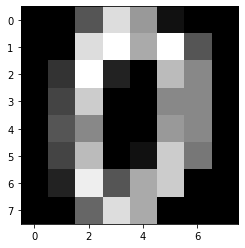

In [ ]:
digits = load_digits()
print(digits.data.shape)

plt.imshow(digits.images[0].reshape(8,8), cmap="gray")

Evalúe los distintos algoritmos entrenando con esta base de datos.

# Regression

In [77]:
# import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_regression

# import classifiers
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Import validation
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

In [ ]:
X, y = make_regression(n_samples = _ , n_features = 1 , noise = 20 , random_state = 1)

X_train, X_test, y_train, y_test = train_test_split( _ , _ , test_size = 0.2, random_state = 1)

np.random.seed(0)
# y_test = y_test + np.random.normal(len(y_test)) * 0.1

# Plot train / test data
_, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].scatter(X, y, c='b', edgecolors='k')
axes[1].scatter( _ , _ , c = 'b', edgecolors='k')
axes[1].scatter( _ , _ , c = 'r', edgecolors='k')

In [ ]:
# Train models
models = [ _ , _ , _ ]
names = [ _ , _ , _ ]


_, axes = plt.subplots(1, len(models), figsize=(5*len(models), 5))
predictions = {}

for name, model, ax in zip(names, models, axes):
  #
  model.fit( _ , _ )
  _ # make predictions

  ax.scatter ( _ , _ , c = 'b', edgecolors='k')
  ax.scatter ( _ , _ , c = 'g', edgecolors='k')


## Metricas de desempeño

Módulo de [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Compute MAE and MSE

for name in names:
  print ('Results for {0} '.format(name).center(50, '-'))
  mse_ = mean_squared_error( _ , _ )
  mae_ = mean_absolute_error( _ , _ )
  print ('MSE: {0}'.format(mse_))
  print ('MAE: {0} \n'.format(mae_))

## Cross validation

In [ ]:
models = [ _ , _ , _ ]
names = [ _ , _ , _ ]

predictions = {}

cv = KFold(n_splits = _ , shuffle = True, random_state=1)

# fit the models
for name, model in zip(names, models) :
    #
    cross_val_score_ = cross_val_score( _ , _ , _ , cv=cv, scoring="neg_mean_absolute_error")
    print (name, ':\t', cross_val_score_, '\tmean: ', np.mean(cross_val_score_))



In [ ]:
models = [ _ , _ , _ ]
names = [ _ , _ , _ ]

predictions = {}

cv = KFold(n_splits = _ , shuffle = True, random_state=1)

# fit the models
for name, model in zip(names, models) :
    #
    for i, (splits_train, splits_val) in enumerate(cv.split(X_train, y_train)):
      X_train_cv = _ 
      y_train_cv = _ 
      X_val_cv  = _ 
      y_val_cv  = _ 

      model.fit( _ , _ )

      predictions[name + '_{0}'.format(i)] = model.predict( _ )

In [ ]:
predictions.keys()